In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import scipy.stats as stats
from scipy.stats import chi2_contingency

from sklearn import preprocessing 
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.svm import SVR, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import Imputer

#import xgboost as xgb
from functools import reduce
from imblearn.over_sampling import SMOTE
import itertools
import copy
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline
plt.style.use('fivethirtyeight')

C:\Users\zhezh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\zhezh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\zhezh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\zhezh\Anaconda3\lib\site-packages\tensorflow\python\framework\

In [3]:
df0 = pd.read_csv('Diabetes Project Part 1.csv')
df_zscore = pd.read_csv('Diabetes Project Part 1_zscore.csv')
df_maxmin = pd.read_csv('Diabetes Project Part 1_maxmin.csv')
df_normalized = pd.read_csv('Diabetes Project Part 1_normalized.csv')

In [4]:
# set SEQN to index of the df0
df0.set_index('ID', inplace=True)      

# if has duplicated indexs(ID), keep the first one 
df0 = df0[~df0.index.duplicated(keep='first')] 

df = df0.copy(deep=True)
print(df.columns.values)
df.head()

['12drinksayear' '5drinks2hours' '5drinksaday' 'BMI' 'LDL' 'age'
 'diabetes' 'fasting_glucose' 'gender' 'race' 'sitting' 'sleeping' 'sugar'
 'sysBP' 'diaBP']


,12drinksayear,5drinks2hours,5drinksaday,BMI,LDL,age,diabetes,fasting_glucose,gender,race,sitting,sleeping,sugar,sysBP,diaBP
ID,,,,,,,,,,,,,,,
83733.0,1.0,0.0,1.0,30.8,3.0,53.0,0.0,5.59,1.0,3.0,5.000000,8.000000,0.750,140.000000,86.000000
83734.0,1.0,0.0,1.0,28.8,2.0,78.0,1.0,4.66,1.0,3.0,8.000000,7.000000,1.600,135.333333,45.333333
83736.0,0.0,0.0,0.0,20.3,2.0,42.0,0.0,4.66,2.0,4.0,9.000000,7.718424,2.750,104.000000,60.000000
83737.0,0.0,0.0,0.0,28.6,2.0,72.0,0.0,5.93,2.0,1.0,0.166667,9.000000,0.070,119.333333,58.666667
83741.0,1.0,0.0,1.0,28.0,2.0,22.0,0.0,5.27,1.0,4.0,9.000000,6.500000,1.085,111.333333,72.666667


In [5]:
# set SEQN to index of the df_zscore
df_zscore.set_index('ID', inplace=True)      

# if has duplicated indexs(ID), keep the first one 
df_zscore = df_zscore[~df_zscore.index.duplicated(keep='first')] 
print(df_zscore.columns.values)
df_zscore.head()

['12drinksayear' '5drinks2hours' '5drinksaday' 'BMI' 'LDL' 'age'
 'diabetes' 'fasting_glucose' 'gender' 'race' 'sitting' 'sleeping' 'sugar'
 'sysBP' 'diaBP']


,12drinksayear,5drinks2hours,5drinksaday,BMI,LDL,age,diabetes,fasting_glucose,gender,race,sitting,sleeping,sugar,sysBP,diaBP
ID,,,,,,,,,,,,,,,
83733.0,1.0,-0.145691,1.0,0.228706,2.072321,0.238124,0.0,-0.305181,1.0,3.0,-0.346925,1.779442e-01,-0.760390,0.861028,1.443065
83734.0,1.0,-0.145691,1.0,-0.059931,0.470646,1.591575,1.0,-0.722354,1.0,3.0,0.545482,-4.540141e-01,-0.187783,0.598762,-1.928683
83736.0,0.0,-0.145691,0.0,-1.286642,0.470646,-0.357394,0.0,-0.722354,2.0,4.0,0.842950,-5.612918e-16,0.586921,-1.162165,-0.712643
83737.0,0.0,-0.145691,0.0,-0.088795,0.470646,1.266747,0.0,-0.152666,2.0,1.0,-1.784690,8.099026e-01,-1.218475,-0.300435,-0.823192
83741.0,1.0,-0.145691,1.0,-0.175387,0.470646,-1.440155,0.0,-0.448724,1.0,4.0,0.842950,-7.699933e-01,-0.534715,-0.750033,0.337574


In [6]:
# set SEQN to index of the df_maxmin
df_maxmin.set_index('ID', inplace=True)      

# if has duplicated indexs(ID), keep the first one 
df_maxmin = df_maxmin[~df_maxmin.index.duplicated(keep='first')] 

print(df_maxmin.columns.values)
df_maxmin.head()

['12drinksayear' '5drinks2hours' '5drinksaday' 'BMI' 'LDL' 'age'
 'diabetes' 'fasting_glucose' 'gender' 'race' 'sitting' 'sleeping' 'sugar'
 'sysBP' 'diaBP']


,12drinksayear,5drinks2hours,5drinksaday,BMI,LDL,age,diabetes,fasting_glucose,gender,race,sitting,sleeping,sugar,sysBP,diaBP
ID,,,,,,,,,,,,,,,
83733.0,1.0,0.0,1.0,0.317814,1.0,0.564516,0.0,0.173810,1.0,3.0,0.217391,0.480000,0.060935,0.383886,0.682540
83734.0,1.0,0.0,1.0,0.277328,0.5,0.967742,1.0,0.137239,1.0,3.0,0.347826,0.400000,0.131886,0.350711,0.359788
83736.0,0.0,0.0,0.0,0.105263,0.5,0.387097,0.0,0.137239,2.0,4.0,0.391304,0.457474,0.227880,0.127962,0.476190
83737.0,0.0,0.0,0.0,0.273279,0.5,0.870968,0.0,0.187180,2.0,1.0,0.007246,0.560000,0.004174,0.236967,0.465608
83741.0,1.0,0.0,1.0,0.261134,0.5,0.064516,0.0,0.161227,1.0,4.0,0.391304,0.360000,0.088898,0.180095,0.576720


In [7]:
# if has duplicated indexs(ID), keep the first one 
df_normalized.set_index('Unnamed: 0', inplace=True)   
df_normalized = df_normalized[~df_normalized.index.duplicated(keep='first')] 
print(df_normalized.columns.values)
df_normalized.head()

['12drinksayear' '5drinks2hours' '5drinksaday' 'BMI' 'LDL' 'age'
 'diabetes' 'fasting_glucose' 'gender' 'race' 'sitting' 'sleeping' 'sugar'
 'sysBP' 'diaBP']


,12drinksayear,5drinks2hours,5drinksaday,BMI,LDL,age,diabetes,fasting_glucose,gender,race,sitting,sleeping,sugar,sysBP,diaBP
Unnamed: 0,,,,,,,,,,,,,,,
0,0.005689,0.0,0.005689,0.175228,0.017068,0.301529,0.000000,0.031803,0.005689,0.017068,0.028446,0.045514,0.004267,0.796491,0.489273
1,0.006037,0.0,0.006037,0.173867,0.012074,0.470889,0.006037,0.028133,0.006037,0.018111,0.048296,0.042259,0.009659,0.817013,0.273679
2,0.000000,0.0,0.000000,0.156683,0.015437,0.324173,0.000000,0.035968,0.015437,0.030874,0.069466,0.059574,0.021226,0.802713,0.463104
3,0.000000,0.0,0.000000,0.185350,0.012962,0.466615,0.000000,0.038431,0.012962,0.006481,0.001080,0.058327,0.000454,0.773371,0.380205
4,0.007232,0.0,0.007232,0.202501,0.014464,0.159108,0.000000,0.038114,0.007232,0.028929,0.065090,0.047009,0.007847,0.805184,0.525540


In [8]:
numerical_variables = ['5drinks2hours', 'BMI','age','fasting_glucose', 'sitting', 'sleeping', 'sugar', 'sysBP', 'diaBP', 'LDL']
categorical_variables = ['12drinksayear', '5drinksaday', 'diabetes', 'race', 'gender']

# Feature selection

* initial screening
    #### 1. Filter Method 
    * filter and take only the subset of the relevant features. The model is built after selecting the features
    * commonly done using Pearson correlation.
    * Filter method is less accurate. 
    * It is great while doing EDA, it can also be used for checking multi co-linearity in data.
    
    
    
    
* during model training
    * see part 3 for this
    * more accurate results 
    * computationally expensive - recursive
    * when number of features < 20
        #### 2. Wrapper Method 
        * A wrapper method needs one machine learning algorithm and uses its performance as evaluation criteria. This means, you feed the features to the selected Machine Learning algorithm and based on the model performance you add/remove the features. 
        * more accurate than the filter method
    
    #### 3. Embedded Method 
        * Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.
        * Lasso regularization. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.

# Numerical Variables

### 1. Normalization: Scale numerical variables

In [9]:
def scaler(df,feature):
    X = np.array(df[feature])
    X = preprocessing.scale(X)
    df[feature] = X
    return df

In [10]:
df = scaler(df,'5drinks2hours')
df = scaler(df,'BMI')
df = scaler(df,'age')
df = scaler(df,'fasting_glucose')
df = scaler(df,'sitting')
df = scaler(df,'sleeping')
df = scaler(df,'sugar')
df = scaler(df,'sysBP')
df = scaler(df,'diaBP')
df = scaler(df,'LDL')

Now compare before scaling and after scaling: 

In [11]:
for feature in numerical_variables:
    print('Before scaling:')
    print(df0[feature].describe())
    print('After scaling:')
    print(df[feature].describe())
    print('-------------------------')    

Before scaling:
count    2600.000000
mean        0.203846
std         1.399439
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.000000
Name: 5drinks2hours, dtype: float64
After scaling:
count    2.600000e+03
mean     6.410470e-16
std      1.000192e+00
min     -1.456907e-01
25%     -1.456907e-01
50%     -1.456907e-01
75%     -1.456907e-01
max      1.414849e+01
Name: 5drinks2hours, dtype: float64
-------------------------
Before scaling:
count    2600.000000
mean       29.215271
std         6.930430
min        15.100000
25%        24.300000
50%        28.200000
75%        32.900000
max        64.500000
Name: BMI, dtype: float64
After scaling:
count    2.600000e+03
mean    -4.295709e-17
std      1.000192e+00
min     -2.037101e+00
25%     -7.093667e-01
50%     -1.465229e-01
75%      5.317761e-01
max      5.092255e+00
Name: BMI, dtype: float64
-------------------------
Before scaling:
count    2600.000000
mean       48.601538
std        18.47

In [12]:
df0[numerical_variables].head()

,5drinks2hours,BMI,age,fasting_glucose,sitting,sleeping,sugar,sysBP,diaBP,LDL
ID,,,,,,,,,,
83733.0,0.0,30.8,53.0,5.59,5.000000,8.000000,0.750,140.000000,86.000000,3.0
83734.0,0.0,28.8,78.0,4.66,8.000000,7.000000,1.600,135.333333,45.333333,2.0
83736.0,0.0,20.3,42.0,4.66,9.000000,7.718424,2.750,104.000000,60.000000,2.0
83737.0,0.0,28.6,72.0,5.93,0.166667,9.000000,0.070,119.333333,58.666667,2.0
83741.0,0.0,28.0,22.0,5.27,9.000000,6.500000,1.085,111.333333,72.666667,2.0


In [13]:
df[numerical_variables].head()

,5drinks2hours,BMI,age,fasting_glucose,sitting,sleeping,sugar,sysBP,diaBP,LDL
ID,,,,,,,,,,
83733.0,-0.145691,0.228706,0.238124,-0.305181,-0.346925,1.779442e-01,-0.760390,0.861028,1.443065,2.072321
83734.0,-0.145691,-0.059931,1.591575,-0.722354,0.545482,-4.540141e-01,-0.187783,0.598762,-1.928683,0.470646
83736.0,-0.145691,-1.286642,-0.357394,-0.722354,0.842950,-1.122584e-15,0.586921,-1.162165,-0.712643,0.470646
83737.0,-0.145691,-0.088795,1.266747,-0.152666,-1.784690,8.099026e-01,-1.218475,-0.300435,-0.823192,0.470646
83741.0,-0.145691,-0.175387,-1.440155,-0.448724,0.842950,-7.699933e-01,-0.534715,-0.750033,0.337574,0.470646


### 2. Check redundancy: Correlations between variables

* Numerical variables

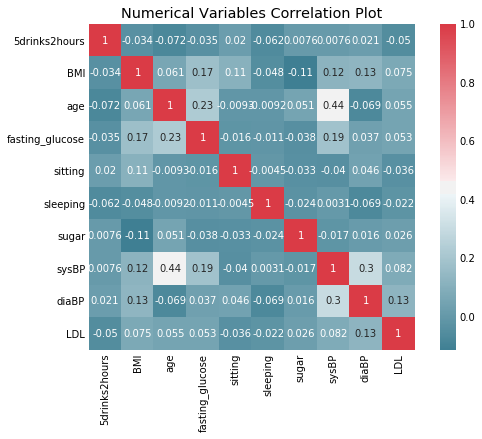

In [14]:
corr_df = df[numerical_variables]
cor = corr_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(8, 6))
plt.title("Numerical Variables Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
plt.show()

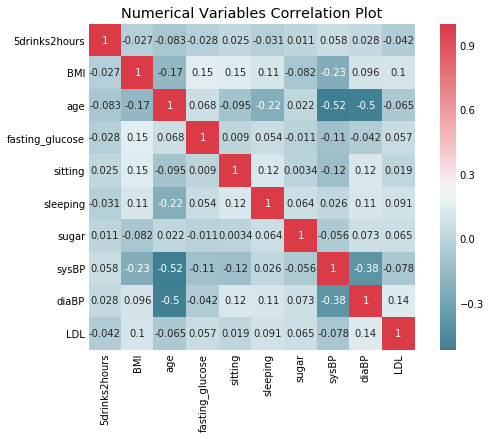

In [15]:
corr_df = df_normalized[numerical_variables]
cor = corr_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(8, 6))
plt.title("Numerical Variables Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
plt.show()

* The correlation coefficient has values between -1 to 1
        — A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
        — A value closer to 1 implies stronger positive correlation
        — A value closer to -1 implies stronger negative correlation
There's no strong correlation between any two variables. The strongest correlation is between sysBP and age features (0.44). Keep all the features as there is no strong evidence of data redundancy for now.

In [16]:
# NOT USED YET
# compare the correlation between features and remove one of two features that have a correlation higher than 0.9
# Now, the dataset has only those columns with correlation less than 0.9

def reduce_highly_correlated_features():
    columns = np.full((corr.shape[0],), True, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= 0.9:
                if columns[j]:
                    columns[j] = False
    selected_columns = data.columns[columns]
    data = data[selected_columns]

* check correlation between each feature and the target y
    * ideally we want to only keep features that are highly correlated to y. However, by setting the correlation coefficient to 0.5, the only feature that passes is fasting_glucose. 

In [17]:
correlation_coefficient = 0.3
def feature_target_correlation(df,threshold):
    cor = df.corr()
    cor_target = abs(cor['diabetes'])
    relevant_features = cor_target[cor_target>threshold]
    return relevant_features

feature_target_correlation(df,correlation_coefficient)

age                0.305881
diabetes           1.000000
fasting_glucose    0.543394
Name: diabetes, dtype: float64

In [18]:
feature_target_correlation(df_normalized,correlation_coefficient)

diabetes           1.000000
fasting_glucose    0.484685
Name: diabetes, dtype: float64

### 3. Visualization for numerical variables

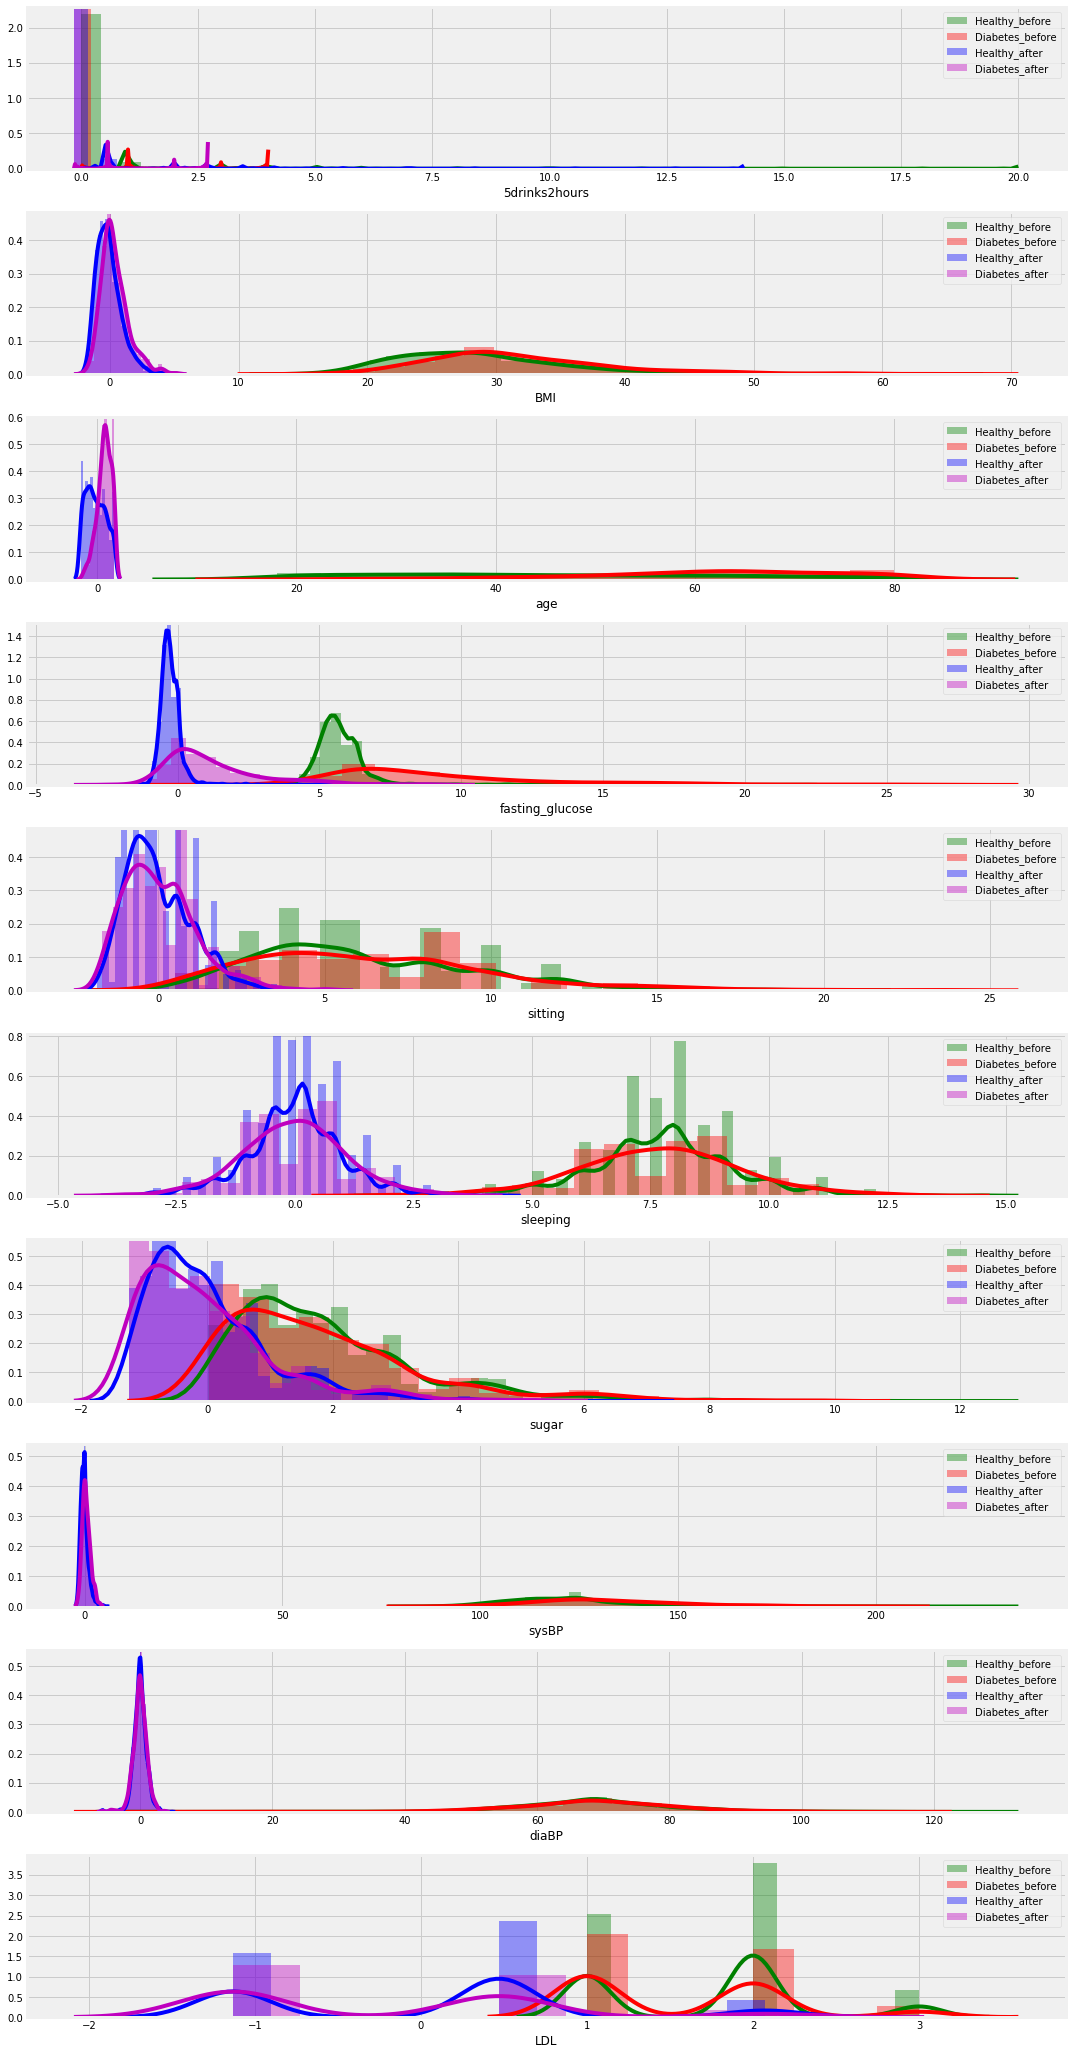

In [19]:
def numerical_variables_visualization():
    fig = plt.figure(figsize = (15, 30))

    j = 0
    h = len(numerical_variables)
    for i in numerical_variables:
        plt.subplot(h, 1, j+1)
        j += 1
        # original data
        sns.distplot(df0[i][df0['diabetes']==0], color='g', label = 'Healthy_before')
        sns.distplot(df0[i][df0['diabetes']==1], color='r', label = 'Diabetes_before')
        # after normalization
        sns.distplot(df[i][df['diabetes']==0], color='b', label = 'Healthy_after')
        sns.distplot(df[i][df['diabetes']==1], color='m', label = 'Diabetes_after')
        plt.legend(loc='best')
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)

numerical_variables_visualization()

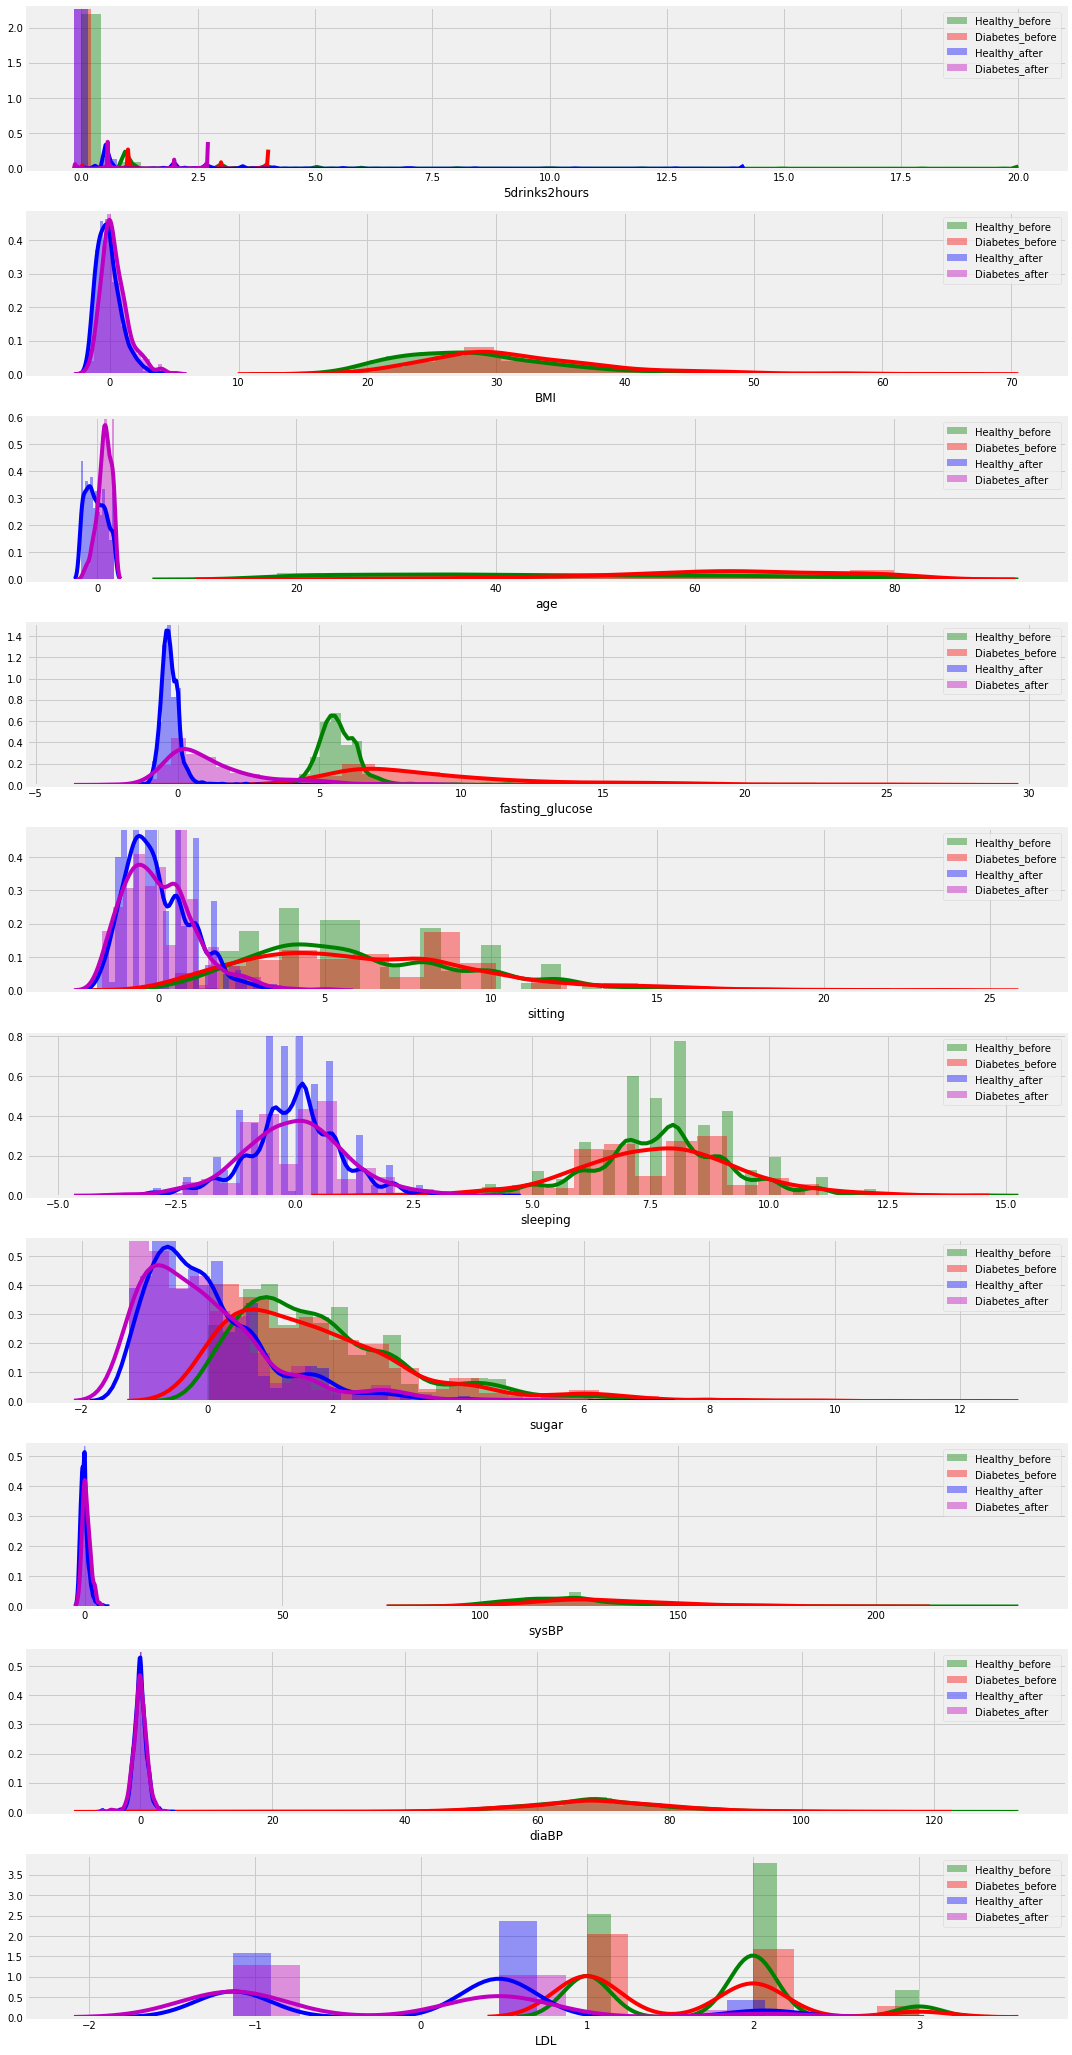

In [20]:
def numerical_variables_visualization_zscore():
    fig = plt.figure(figsize = (15, 30))

    j = 0
    h = len(numerical_variables)
    for i in numerical_variables:
        plt.subplot(h, 1, j+1)
        j += 1
        # original data
        sns.distplot(df0[i][df0['diabetes']==0], color='g', label = 'Healthy_before')
        sns.distplot(df0[i][df0['diabetes']==1], color='r', label = 'Diabetes_before')
        # after normalization
        sns.distplot(df_zscore[i][df['diabetes']==0], color='b', label = 'Healthy_after')
        sns.distplot(df_zscore[i][df['diabetes']==1], color='m', label = 'Diabetes_after')
        plt.legend(loc='best')
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)

numerical_variables_visualization_zscore()

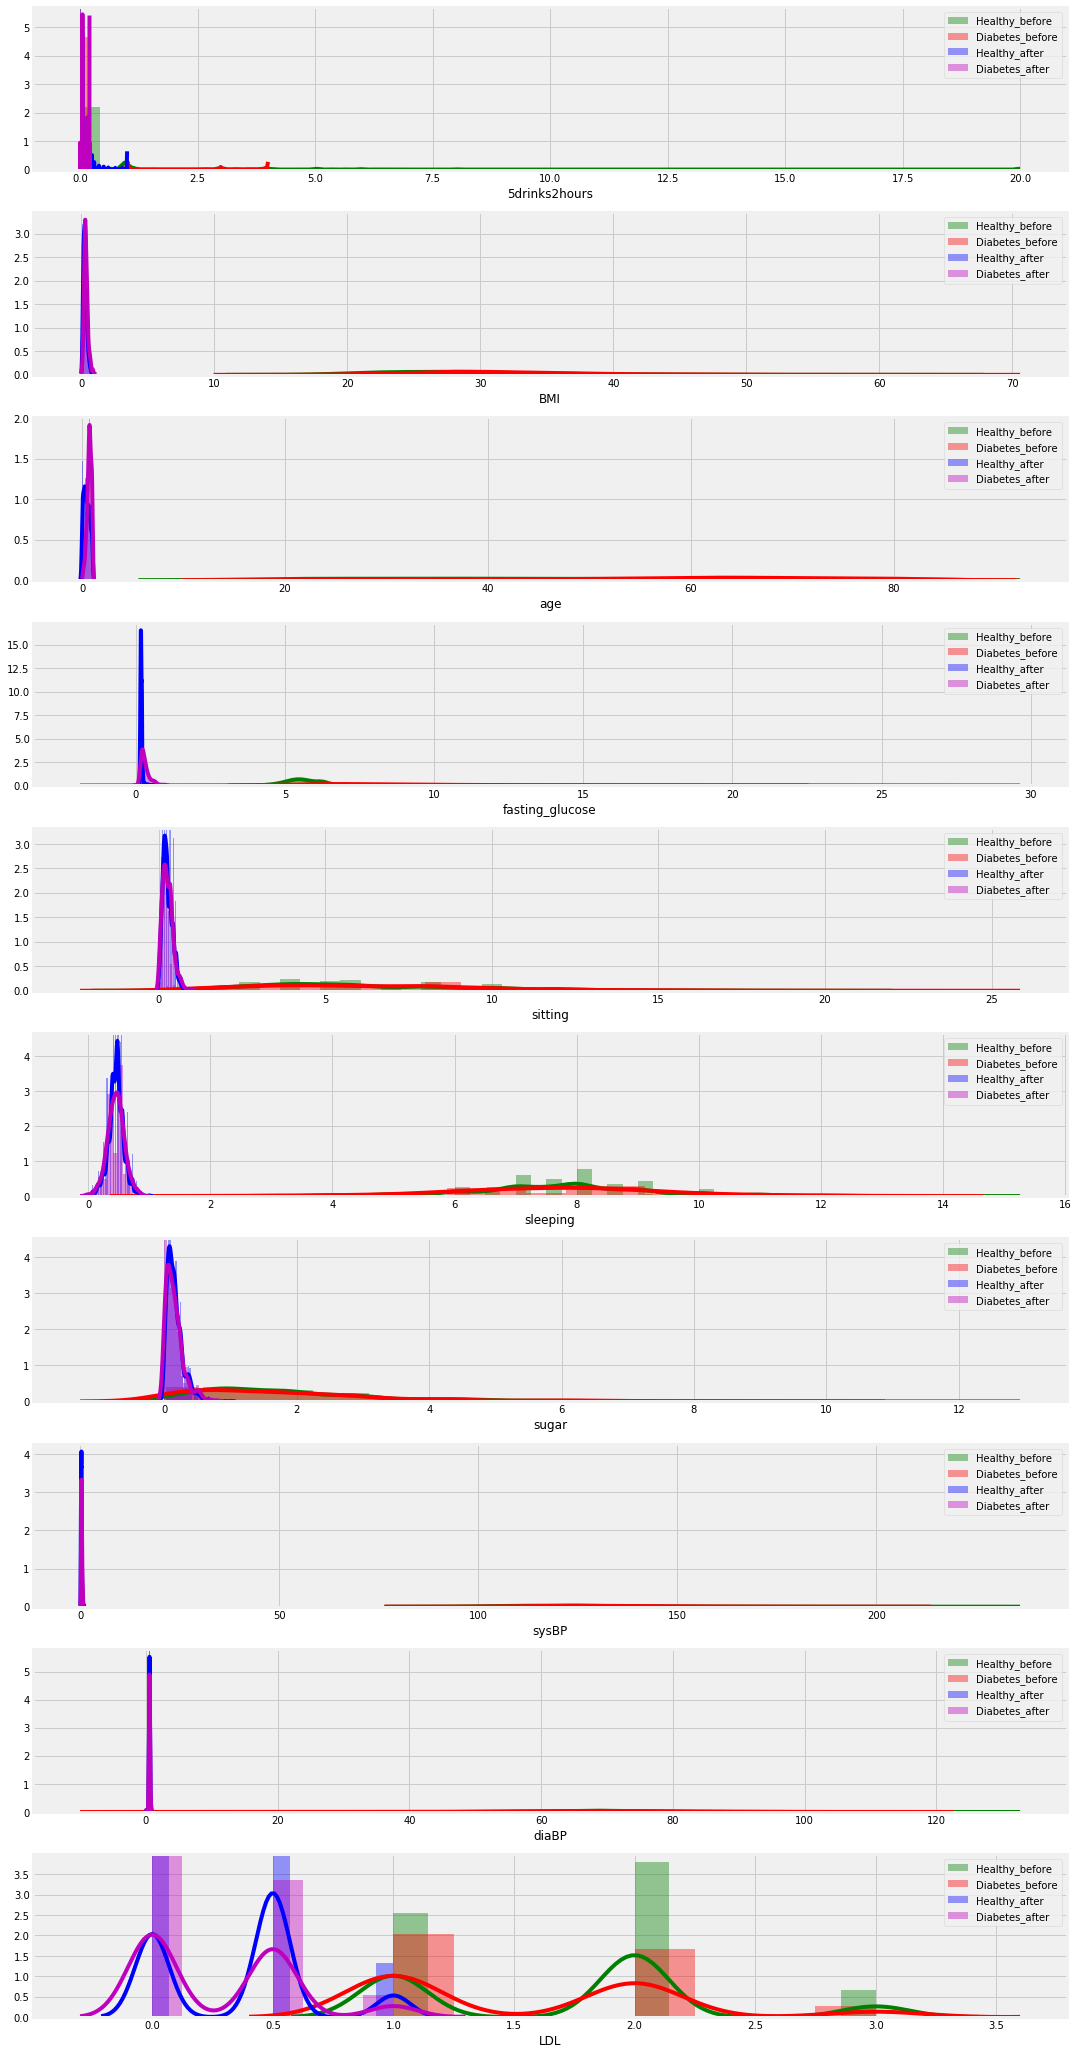

In [21]:
def numerical_variables_visualization_maxmin():
    fig = plt.figure(figsize = (15, 30))

    j = 0
    h = len(numerical_variables)
    for i in numerical_variables:
        plt.subplot(h, 1, j+1)
        j += 1
        # original data
        sns.distplot(df0[i][df0['diabetes']==0], color='g', label = 'Healthy_before')
        sns.distplot(df0[i][df0['diabetes']==1], color='r', label = 'Diabetes_before')
        # after normalization
        sns.distplot(df_maxmin[i][df['diabetes']==0], color='b', label = 'Healthy_after')
        sns.distplot(df_maxmin[i][df['diabetes']==1], color='m', label = 'Diabetes_after')
        plt.legend(loc='best')
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)

numerical_variables_visualization_maxmin()

# Categorical Variables

In [22]:
df[categorical_variables].head()

,12drinksayear,5drinksaday,diabetes,race,gender
ID,,,,,
83733.0,1.0,1.0,0.0,3.0,1.0
83734.0,1.0,1.0,1.0,3.0,1.0
83736.0,0.0,0.0,0.0,4.0,2.0
83737.0,0.0,0.0,0.0,1.0,2.0
83741.0,1.0,1.0,0.0,4.0,1.0


### 1. Encoding

* Label encoding: LDL

* One hot encoding: Problem with label encoding is that it assumes higher the categorical value, better the category. This is why we use one hot encoder to perform “binarization” of the category and include it as a feature to train the model.

In [23]:
def one_hot_encoding(df,col_name,dummies_name):
    dummy = pd.get_dummies(df[col_name])
    dummy.columns = dummies_name
    df = pd.merge(df, dummy, on = 'ID', left_index = True, sort = False)
    df = df.drop([col_name],axis=1)
    return df

In [24]:
df = one_hot_encoding(df,'gender',['male','female'])
df = one_hot_encoding(df,'LDL',['Low LDL','Intermediate LDL','High LDL'])
df = one_hot_encoding(df,'race',['Mexican American','Other Hispanic','Non-Hispanic White','Non-Hispanic Black','Non-Hispanic Asian','Other/Multi-racial'])
df["male","female"].head()

KeyError: ('male', 'female')

In [29]:
df = df.drop(["male"],axis=1)

In [30]:
df.columns.values

array(['12drinksayear', '5drinks2hours', '5drinksaday', 'BMI', 'age',
       'diabetes', 'fasting_glucose', 'sitting', 'sleeping', 'sugar',
       'sysBP', 'diaBP', 'female', 'Low LDL', 'Intermediate LDL',
       'High LDL', 'Mexican American', 'Other Hispanic',
       'Non-Hispanic White', 'Non-Hispanic Black', 'Non-Hispanic Asian',
       'Other/Multi-racial'], dtype=object)

In [31]:
df_zscore = one_hot_encoding(df_zscore,'gender',['male','female'])
df_zscore = one_hot_encoding(df_zscore,'LDL',['Low LDL','Intermediate LDL','High LDL'])
df_zscore = one_hot_encoding(df_zscore,'race',['Mexican American','Other Hispanic','Non-Hispanic White','Non-Hispanic Black','Non-Hispanic Asian','Other/Multi-racial'])


In [32]:
df_zscore = df_zscore.drop(["male"],axis=1)

In [33]:
df_zscore.columns.values

array(['12drinksayear', '5drinks2hours', '5drinksaday', 'BMI', 'age',
       'diabetes', 'fasting_glucose', 'sitting', 'sleeping', 'sugar',
       'sysBP', 'diaBP', 'female', 'Low LDL', 'Intermediate LDL',
       'High LDL', 'Mexican American', 'Other Hispanic',
       'Non-Hispanic White', 'Non-Hispanic Black', 'Non-Hispanic Asian',
       'Other/Multi-racial'], dtype=object)

In [34]:
df_maxmin = one_hot_encoding(df_maxmin,'gender',['male','female'])
df_maxmin = one_hot_encoding(df_maxmin,'LDL',['Low LDL','Intermediate LDL','High LDL'])
df_maxmin = one_hot_encoding(df_maxmin,'race',['Mexican American','Other Hispanic','Non-Hispanic White','Non-Hispanic Black','Non-Hispanic Asian','Other/Multi-racial'])
df_maxmin = df_maxmin.drop(["male"],axis=1)
df_maxmin.columns.values

array(['12drinksayear', '5drinks2hours', '5drinksaday', 'BMI', 'age',
       'diabetes', 'fasting_glucose', 'sitting', 'sleeping', 'sugar',
       'sysBP', 'diaBP', 'female', 'Low LDL', 'Intermediate LDL',
       'High LDL', 'Mexican American', 'Other Hispanic',
       'Non-Hispanic White', 'Non-Hispanic Black', 'Non-Hispanic Asian',
       'Other/Multi-racial'], dtype=object)

In [35]:
df_normalized = one_hot_encoding(df_normalized,'gender',['male','female'])
df_normalized = one_hot_encoding(df_normalized,'LDL',['Low LDL','Intermediate LDL','High LDL'])
df_normalized = one_hot_encoding(df_normalized,'race',['Mexican American','Other Hispanic','Non-Hispanic White','Non-Hispanic Black','Non-Hispanic Asian','Other/Multi-racial'])
df_normalized = df_normalized.drop(["male"],axis=1)
df_normalized.columns.values

ValueError: Length mismatch: Expected axis has 2600 elements, new values have 2 elements

### 2. Check relationship with y: chi-square test

In [36]:
y = df['diabetes']
categorical_variables = ['male','female','Low LDL','Intermediate LDL','High LDL','Mexican American','Other Hispanic','Non-Hispanic White','Non-Hispanic Black','Non-Hispanic Asian','Other/Multi-racial']
for categorical_variable in categorical_variables:
    csq = chi2_contingency(pd.crosstab(y, df[categorical_variable]))
    p_value = csq[1]
    if p_value>0.05: 
        print(categorical_variable)
        print("P-value: ", p_value)
    else: pass

KeyError: 'male'

* interpretation: P values > 0.05 - High LDL, other hispanic, multiracial are independent of diabetes (no correlation with y, provide no information regarding y)

#### Assign datatypes

In [37]:
for categorical_variable in categorical_variables:
    df[categorical_variable] = df[categorical_variable].astype('category')

KeyError: 'male'

# Feature selection CONT.

* Select based on correlations (see above)
* Select based on p values. If the pvalue is above 0.05 then we remove the feature
* performance metrics:
  -True and false positive rate
  -Sensitivity (AKA true positive rate) and specificity
  -False negative and false positive rate

## Meta metrics:
* Time in which the model needs to fit/train to the data
* Time it takes for a fitted model to predict new instances of data
* The size of the data in case data must be persisted (stored for later)

In [38]:
# import out grid search module
from sklearn.model_selection import GridSearchCV
def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model,params,error_score=0.) # if a parameter set raises an error, continue and set the performance as a big, fat 0
    grid.fit(X, y) # fit the model and parameters
     # our classical metric for performance
    print ("Best Accuracy: {}".format(grid.best_score_))
     # the best parameters that caused the best accuracy
    print ("Best Parameters: {}".format(grid.best_params_))
     # the average time it took a model to fit to the data (in seconds)
    print ("Average Time to Fit (s):{}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
     # the average time it took a model to predict out of sample data (in seconds)
     # this metric gives us insight into how this model will perform in real-time analysis
    print ("Average Time to Score (s):{}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))

In [39]:
# Import four machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [40]:
# Set up some parameters for our grid search
# We will start with four different machine learning model parameters
# Logistic Regression
lr_params = {'C':[1e-1, 1e0, 1e1, 1e2], 'penalty':['l1', 'l2']}
# KNN
knn_params = {'n_neighbors': [1, 3, 5, 7]}
# Decision Tree
tree_params = {'max_depth':[None, 1, 3, 5, 7]}
# Random Forest
forest_params = {'n_estimators': [10, 50, 100], 'max_depth': [None, 1, 3, 5, 7]}

In [41]:
yorig = df['diabetes']
Xorig = df.drop(['diabetes'],axis = 1)
X, X_test, y, y_test = train_test_split(Xorig, yorig, test_size=0.2, random_state = 2)

In [42]:
# instantiate the four machine learning models
lr = LogisticRegression()
knn = KNeighborsClassifier()
d_tree = DecisionTreeClassifier()
forest = RandomForestClassifier()

In [43]:
get_best_model_and_accuracy(lr, lr_params, X, y)

Best Accuracy: 0.9076923076923077
Best Parameters: {'C': 1.0, 'penalty': 'l2'}
Average Time to Fit (s):0.013
Average Time to Score (s):0.002


In [44]:
get_best_model_and_accuracy(knn, knn_params, X, y)

Best Accuracy: 0.8923076923076924
Best Parameters: {'n_neighbors': 5}
Average Time to Fit (s):0.005
Average Time to Score (s):0.054


In [45]:
# bring in some familiar modules for dealing with this sort of thing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# construct pipeline parameters based on the parameters
# for KNN on its own
knn_pipe_params = {'classifier__{}'.format(k): v for k, v in knn_params.items()}
# KNN requires a standard scalar due to using Euclidean distance # as the main equation for predicting observations
knn_pipe = Pipeline([('scale', StandardScaler()), ('classifier', knn)])
# quick to fit, very slow to predict
get_best_model_and_accuracy(knn_pipe, knn_pipe_params, X, y)

Best Accuracy: 0.8889423076923076
Best Parameters: {'classifier__n_neighbors': 5}
Average Time to Fit (s):0.007
Average Time to Score (s):0.065


In [46]:
get_best_model_and_accuracy(d_tree, tree_params, X, y)

Best Accuracy: 0.9067307692307692
Best Parameters: {'max_depth': 3}
Average Time to Fit (s):0.006
Average Time to Score (s):0.001


In [47]:
get_best_model_and_accuracy(forest, forest_params, X, y)

Best Accuracy: 0.9096153846153846
Best Parameters: {'max_depth': 5, 'n_estimators': 10}
Average Time to Fit (s):0.093
Average Time to Score (s):0.008


# The types of feature selection

##  Statistical-based feature selection
    -Pearson correlations
    -hypothesis testing

In [48]:
df.corr()['diabetes']

12drinksayear        -0.067034
5drinks2hours        -0.050425
5drinksaday           0.050838
BMI                   0.159166
age                   0.305881
diabetes              1.000000
fasting_glucose       0.543394
sitting               0.020397
sleeping             -0.007317
sugar                -0.016572
sysBP                 0.182378
diaBP                -0.006720
female               -0.047723
Low LDL               0.108135
Intermediate LDL     -0.086916
High LDL             -0.031997
Mexican American      0.040686
Other Hispanic        0.012021
Non-Hispanic White   -0.045173
Non-Hispanic Black    0.048295
Non-Hispanic Asian   -0.046324
Other/Multi-racial   -0.015270
Name: diabetes, dtype: float64

In [49]:
df.corr()['diabetes'].abs()>.2

12drinksayear         False
5drinks2hours         False
5drinksaday           False
BMI                   False
age                    True
diabetes               True
fasting_glucose        True
sitting               False
sleeping              False
sugar                 False
sysBP                 False
diaBP                 False
female                False
Low LDL               False
Intermediate LDL      False
High LDL              False
Mexican American      False
Other Hispanic        False
Non-Hispanic White    False
Non-Hispanic Black    False
Non-Hispanic Asian    False
Other/Multi-racial    False
Name: diabetes, dtype: bool

In [50]:
highly_correlated_features =df.columns[df.corr()['diabetes'].abs() > .1]
highly_correlated_features

Index(['BMI', 'age', 'diabetes', 'fasting_glucose', 'sysBP', 'Low LDL'], dtype='object')

In [51]:
highly_correlated_features = highly_correlated_features.drop('diabetes')

In [52]:
highly_correlated_features

Index(['BMI', 'age', 'fasting_glucose', 'sysBP', 'Low LDL'], dtype='object')

In [53]:
X_subsetted = X[highly_correlated_features]

In [54]:
get_best_model_and_accuracy(d_tree, tree_params, X_subsetted, y)

Best Accuracy: 0.9091346153846154
Best Parameters: {'max_depth': 3}
Average Time to Fit (s):0.004
Average Time to Score (s):0.002


In [55]:
get_best_model_and_accuracy(forest, forest_params,X_subsetted, y)

Best Accuracy: 0.9100961538461538
Best Parameters: {'max_depth': 3, 'n_estimators': 10}
Average Time to Fit (s):0.094
Average Time to Score (s):0.009


In [56]:
from sklearn.metrics import accuracy_score
rf_final = RandomForestClassifier(n_estimators = 10,max_depth = 5)
final_model = rf_final.fit(X, y.values.ravel())
final_predictions = rf_final.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)
print(final_accuracy)

0.9115384615384615


In [57]:
get_best_model_and_accuracy(lr, lr_params, X_subsetted, y)


Best Accuracy: 0.9048076923076923
Best Parameters: {'C': 1.0, 'penalty': 'l2'}
Average Time to Fit (s):0.004
Average Time to Score (s):0.001


In [58]:
logreg = LogisticRegression(C= 1.0, penalty="l2")
logreg.fit(X, y)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[419   9]
 [ 46  46]]


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       428
         1.0       0.84      0.50      0.63        92

    accuracy                           0.89       520
   macro avg       0.87      0.74      0.78       520
weighted avg       0.89      0.89      0.88       520



In [61]:
from sklearn.base import TransformerMixin, BaseEstimator
class CustomCorrelationChooser(TransformerMixin, BaseEstimator):
    def __init__(self, response, cols_to_keep=[], threshold=None):
     # store the response series
        self.response = response
        # store the threshold that we wish to keep
        self.threshold = threshold
         # initialize a variable that will eventually
         # hold the names of the features that we wish to keep
        self.cols_to_keep = cols_to_keep
    def transform(self, X):
         # the transform method simply selects the appropiate
         # columns from the original dataset
          return X[self.cols_to_keep]
    def fit(self, X, *_):
 # create a new dataframe that holds both features and response
         df = pd.concat([X, self.response], axis=1)
 # store names of columns that meet correlation threshold
         self.cols_to_keep = df.columns[df.corr()[df.columns[-1]].abs() >self.threshold]
 # only keep columns in X, for example, will remove response variable
         self.cols_to_keep = [c for c in self.cols_to_keep if c in X.columns]
         return self

In [62]:
ccc = CustomCorrelationChooser(threshold=.1, response=y)
ccc.fit(X)
ccc.cols_to_keep

['BMI', 'age', 'fasting_glucose', 'sysBP', 'Low LDL']

In [63]:
# instantiate our feature selector with the response variable set
ccc = CustomCorrelationChooser(response=y)
# make our new pipeline, including the selector
ccc_pipe = Pipeline([('correlation_select', ccc),('classifier', d_tree)])
# make a copy of the decisino tree pipeline parameters
ccc_pipe_params={'correlation_select__threshold': [0, 0.1, 0.2,0.3], 'classifier__max_depth': [None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19,21]}
# better than original (by a little, and a bit faster on
# average overall
get_best_model_and_accuracy(ccc_pipe, ccc_pipe_params, X, y)


Best Accuracy: 0.9072115384615385
Best Parameters: {'classifier__max_depth': 3, 'correlation_select__threshold': 0.1}
Average Time to Fit (s):0.012
Average Time to Score (s):0.002


## Feature selection using hypothesis testing

In [64]:
# SelectKBest selects features according to the k highest scores of a given scoring function
from sklearn.feature_selection import SelectKBest
# This models a statistical test known as ANOVA
from sklearn.feature_selection import f_classif
# f_classif allows for negative values, not all do
# chi2 is a very common classification criteria but only allows for positive values
# regression has its own statistical tests

In [65]:
# keep only the best five features according to p-values of ANOVA test
k_best = SelectKBest(f_classif, k=5)

In [66]:
# matrix after selecting the top 5 features
k_best.fit_transform(X, y)

array([[-9.69140803e-01, -8.98774777e-01, -5.33953066e-01,
        -1.38696441e+00,  0.00000000e+00],
       [-4.20728840e-01, -1.60256932e+00, -6.23667678e-01,
        -5.25234093e-01,  0.00000000e+00],
       [ 3.73025316e-01,  1.05019471e+00,  1.12128153e+00,
        -7.02593006e-04,  0.00000000e+00],
       ...,
       [ 7.77118341e-01,  6.17090383e-01,  1.76274101e+00,
         2.24096621e-01,  0.00000000e+00],
       [-2.18682328e-01,  7.57099687e-02, -2.96209343e-01,
        -4.87767557e-01,  0.00000000e+00],
       [-8.39253759e-01,  9.41918631e-01, -5.20495874e-01,
         1.11697014e-01,  0.00000000e+00]])

In [67]:
# get the p values of columns
k_best.pvalues_
# make a dataframe of features and p-values
# sort that dataframe by p-value
p_values = pd.DataFrame({'column': X.columns, 'p_value':
k_best.pvalues_}).sort_values('p_value')
# show the top 5 features
p_values.head()

,column,p_value
5,fasting_glucose,2.486690e-154
4,age,6.383630e-44
9,sysBP,5.608239e-15
3,BMI,1.643421e-12
12,Low LDL,8.296683e-08


In [68]:
# features with a low p value
p_values[p_values['p_value'] < .05]

,column,p_value
5,fasting_glucose,2.486690e-154
4,age,6.383630e-44
9,sysBP,5.608239e-15
3,BMI,1.643421e-12
12,Low LDL,8.296683e-08
13,Intermediate LDL,2.477813e-05
11,female,3.742947e-03
0,12drinksayear,7.814751e-03
2,5drinksaday,1.469196e-02
1,5drinks2hours,2.947826e-02


In [69]:
# features with a high p value
p_values[p_values['p_value'] >= .05]

,column,p_value
15,Mexican American,0.068737
14,High LDL,0.068826
18,Non-Hispanic Black,0.108292
7,sleeping,0.436897
10,diaBP,0.456766
16,Other Hispanic,0.459727
6,sitting,0.474844
8,sugar,0.573054
20,Other/Multi-racial,0.954056


In [70]:
k_best = SelectKBest(f_classif)
# Make a new pipeline with SelectKBest
select_k_pipe = Pipeline([('k_best', k_best),('classifier', d_tree)])
select_k_best_pipe_params= {'k_best__k': [1, 2, 3, 4, 5, 6, 7, 8, 9,10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 'all'],'classifier__max_depth': [None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
# comparable to our results with correlationchooser
get_best_model_and_accuracy(select_k_pipe, select_k_best_pipe_params, X, y)

Best Accuracy: 0.9091346153846154
Best Parameters: {'classifier__max_depth': 3, 'k_best__k': 5}
Average Time to Fit (s):0.007
Average Time to Score (s):0.001


## Tree-based model feature selection metrics
When fitting decision trees, the tree starts at the root node and greedily chooses the optimal
split at every junction that optimizes a certain metric of node purity. By default, scikit-learn
optimizes for the gini metric at every step. While each split is created, the model keeps
track of how much each split helps the overall optimization goal. In doing so, tree-based
models that choose splits based on such metrics have a notion of feature importance.


In [71]:
# create a brand new decision tree classifier
tree = DecisionTreeClassifier()
tree.fit(X, y)
# note that we have some other features in play besides what our last two selectors decided for us
importances = pd.DataFrame({'importance': tree.feature_importances_,'feature':X.columns}).sort_values('importance', ascending=False)
importances.head()

,importance,feature
5,0.487621,fasting_glucose
3,0.099053,BMI
7,0.069963,sleeping
4,0.059250,age
8,0.058951,sugar


## Linear models and regularization
* L1 regularization, also known as lasso regularization, uses the L1 Norm, which,using the above formula, reduces to the sum of the absolute values of the entriesof a vector to limit the coefficients in such a way that they may disappear entirely and become 0. If the coefficient of a feature drops to 0, then that feature will not have any say in the prediction of new data observations and definitely will not be chosen by a SelectFromModel selector.
* L2 regularization, also known as ridge regularization, imposes the L2 norm as apenalty (sum of the square of vector entries) so that coefficients cannot drop to 0, but they can become very, very tiny

In [72]:
from sklearn.feature_selection import SelectFromModel
# a new selector that uses the coefficients from a regularized logistic regression as feature importances
logistic_selector = SelectFromModel(LogisticRegression())
# make a new pipeline that uses coefficients from LogistisRegression as a feature ranker
regularization_pipe = Pipeline([('select', logistic_selector), ('classifier', tree)])
regularization_pipe_params= {'select__threshold': [0.01, 0.05, 0.1,'mean', 'median', '2.*mean'], 'classifier__max_depth': [1, 3, 5, 7],'select__estimator__penalty': ['l1', 'l2']}
get_best_model_and_accuracy(regularization_pipe,regularization_pipe_params,X, y)

Best Accuracy: 0.9076923076923077
Best Parameters: {'classifier__max_depth': 3, 'select__estimator__penalty': 'l1', 'select__threshold': 0.1}
Average Time to Fit (s):0.01
Average Time to Score (s):0.001


In [73]:
# set the optimal params to the pipeline
regularization_pipe.set_params(**{'select__threshold': 0.01, 'classifier__max_depth': 5, 'select__estimator__penalty': 'l1'})
# fit our pipeline to our data
regularization_pipe.steps[0][1].fit(X, y)
# list the columns that the Logisti Regression selected by calling the get_support() method from SelectFromModel
X.columns[regularization_pipe.steps[0][1].get_support()]

Index(['12drinksayear', '5drinks2hours', '5drinksaday', 'BMI', 'age',
       'fasting_glucose', 'sitting', 'sleeping', 'sugar', 'sysBP', 'diaBP',
       'female', 'Intermediate LDL', 'High LDL', 'Other Hispanic',
       'Non-Hispanic White'],
      dtype='object')

In [74]:
# SVC is a linear model that uses linear supports to
# seperate classes in euclidean space
# This model can only work for binary classification tasks
from sklearn.svm import LinearSVC
# Using a support vector classifier to get coefficients
svc_selector = SelectFromModel(LinearSVC())
svc_pipe = Pipeline([('select', svc_selector),('classifier', tree)])
svc_pipe_params ={ 'select__estimator__loss': ['squared_hinge','hinge'], 'select__threshold': [0.01, 0.05, 0.1, 'mean', 'median','2.*mean'], 'select__estimator__penalty': ['l1', 'l2'],'classifier__max_depth': [1, 3, 5, 7], 'select__estimator__dual': [True,False]}
get_best_model_and_accuracy(svc_pipe,svc_pipe_params,X, y)


Best Accuracy: 0.9105769230769231
Best Parameters: {'classifier__max_depth': 5, 'select__estimator__dual': False, 'select__estimator__loss': 'squared_hinge', 'select__estimator__penalty': 'l1', 'select__threshold': 'mean'}
Average Time to Fit (s):0.018
Average Time to Score (s):0.001


In [75]:
# set the optimal params to the pipeline
svc_pipe.set_params(**{'select__estimator__loss': 'squared_hinge','select__threshold': 0.01,'select__estimator__penalty': 'l1','classifier__max_depth': 5,'select__estimator__dual': False})
# fit our pipeline to our data
svc_pipe.steps[0][1].fit(X, y)
# list the columns that the SVC selected by calling the get_support() method from SelectFromModel
X.columns[svc_pipe.steps[0][1].get_support()]

Index(['12drinksayear', '5drinks2hours', '5drinksaday', 'BMI', 'age',
       'fasting_glucose', 'sitting', 'sugar', 'female', 'Intermediate LDL',
       'High LDL', 'Other Hispanic', 'Non-Hispanic White'],
      dtype='object')

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    
def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [98]:
calculate_vif_(df)

dropping 'Low LDL' at index: 13
Remaining variables:
Index(['12drinksayear', '5drinks2hours', '5drinksaday', 'BMI', 'age',
       'diabetes', 'fasting_glucose', 'sitting', 'sleeping', 'sugar', 'sysBP',
       'diaBP', 'female', 'Intermediate LDL', 'High LDL', 'Mexican American',
       'Other Hispanic', 'Non-Hispanic White', 'Non-Hispanic Black',
       'Non-Hispanic Asian', 'Other/Multi-racial'],
      dtype='object')


,12drinksayear,5drinks2hours,5drinksaday,BMI,age,diabetes,fasting_glucose,sitting,sleeping,sugar,...,diaBP,female,Intermediate LDL,High LDL,Mexican American,Other Hispanic,Non-Hispanic White,Non-Hispanic Black,Non-Hispanic Asian,Other/Multi-racial
ID,,,,,,,,,,,,,,,,,,,,,
83733.0,1.0,-0.145691,1.0,0.228706,0.238124,0.0,-0.305181,-0.346925,1.779442e-01,-0.760390,...,1.443065,0,0,1,0,0,1,0,0,0
83734.0,1.0,-0.145691,1.0,-0.059931,1.591575,1.0,-0.722354,0.545482,-4.540141e-01,-0.187783,...,-1.928683,0,1,0,0,0,1,0,0,0
83736.0,0.0,-0.145691,0.0,-1.286642,-0.357394,0.0,-0.722354,0.842950,-1.122584e-15,0.586921,...,-0.712643,1,1,0,0,0,0,1,0,0
83737.0,0.0,-0.145691,0.0,-0.088795,1.266747,0.0,-0.152666,-1.784690,8.099026e-01,-1.218475,...,-0.823192,1,1,0,1,0,0,0,0,0
83741.0,1.0,-0.145691,1.0,-0.175387,-1.440155,0.0,-0.448724,0.842950,-7.699933e-01,-0.534715,...,0.337574,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93682.0,1.0,-0.145691,0.0,-1.200051,-0.411532,0.0,0.251050,-1.239331,-4.540141e-01,0.475768,...,1.056143,1,1,0,0,0,0,0,1,0
93689.0,0.0,-0.145691,0.0,-0.160955,1.104333,1.0,-0.121266,-0.346925,1.779442e-01,-0.804177,...,-0.215172,1,0,0,1,0,0,0,0,0
93695.0,0.0,-0.145691,0.0,-1.113460,1.483299,0.0,-0.197523,-0.049456,1.125882e+00,0.081679,...,-1.762859,1,0,0,0,0,1,0,0,0


In [96]:
s=["a","b"]
b="+".join(s)
b

'a+b'

In [77]:
# 待完成：sm是statsmodel里的，需要在sklearn里找pvalue相对应的部分

def Backward Elimination():
    import statsmodels.api as sm

    feature_list = list(X_names)
    pmax = 1
    while (len(feature_list)>0):
        p= []
        X_1 = X[feature_list]
        X_1 = sm.add_constant(X_1)
        model = sm.clf(y,X_1).fit()
        p = pd.Series(model.pvalues.values[1:],index = feature_list)      
        pmax = max(p)
        feature_with_p_max = p.idxmax()
        if(pmax>0.05):
            print('')
            feature_list.remove(feature_with_p_max)
        else:
            break
    selected_features_BE = feature_list
    print(selected_features_BE)

SyntaxError: invalid syntax (<ipython-input-77-61ba4262a536>, line 3)

In [ ]:
# https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

def recursive_feature_elimination():
    l = len(X_names)
    feature_num_list=np.arange(1,l)            
    high_score=0
    feature_num=0 # optimal number of feature       
    score_list =[]
    for n in range(len(feature_num_list)):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
        clf = LinearRegression()
        rfe = RFE(clf,feature_num_list[n])
        X_train_rfe = rfe.fit_transform(X_train,y_train)
        X_test_rfe = rfe.transform(X_test)
        clf.fit(X_train_rfe,y_train)
        score = clf.score(X_test_rfe,y_test)
        score_list.append(score)
        if(score>high_score):
            high_score = score
            feature_num = feature_num_list[n]
    print("Optimum number of features: %d" %feature_num)
    print("Accuracy with %d features: %f" % (feature_num, high_score))
    
    # feed optimal feature num into clf 
    cols = list(X_names)
    clf = LinearRegression()
    rfe = RFE(clf, feature_num)             
    X_rfe = rfe.fit_transform(X,y)  

    clf.fit(X_rfe,y)              
    temp = pd.Series(rfe.support_,index = cols)
    selected_features_rfe = temp[temp==True].index
    print(selected_features_rfe)

Best alpha using built-in LassoCV: 0.001369
Best score using built-in LassoCV: 0.363604
Lasso picked 16 variables and eliminated the other 6 variables

The eliminated features are:
sysBP                 0.0
female               -0.0
Intermediate LDL     -0.0
Mexican American      0.0
Non-Hispanic Asian    0.0
Other/Multi-racial   -0.0
dtype: float64


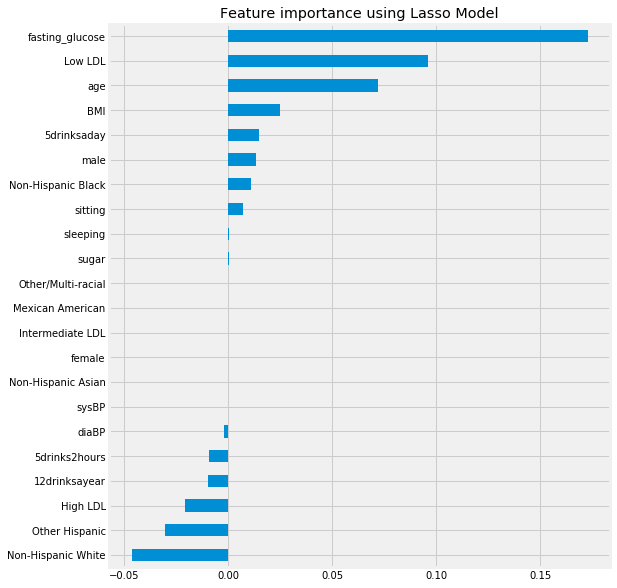

In [25]:
def lasso():
    X = df.drop('diabetes',1)
    y = df['diabetes']
    
    reg = LassoCV()
    reg.fit(X, y)
    coef = pd.Series(reg.coef_, index = X.columns)
    imp_coef = coef.sort_values()
    
    print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
    print("Best score using built-in LassoCV: %f" %reg.score(X,y))
    print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")   
    print()
    print('The eliminated features are:')
    print(coef[reg.coef_==0])
    
    plt.rcParams['figure.figsize'] = (8.0, 10.0)
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using Lasso Model")
    
lasso()

# Visualization

# Export

In [203]:
df.head(10)

,12drinksayear,5drinks2hours,5drinksaday,BMI,age,diabetes,fasting_glucose,sitting,sleeping,sugar,...,female,Low LDL,Intermediate LDL,High LDL,Mexican American,Other Hispanic,Non-Hispanic White,Non-Hispanic Black,Non-Hispanic Asian,Other/Multi-racial
ID,,,,,,,,,,,,,,,,,,,,,
83733.0,1.0,-0.145691,1.0,0.228706,0.238124,0.0,-0.305181,-0.346925,1.779442e-01,-0.760390,...,0,0,0,1,0,0,1,0,0,0
83734.0,1.0,-0.145691,1.0,-0.059931,1.591575,1.0,-0.722354,0.545482,-4.540141e-01,-0.187783,...,0,0,1,0,0,0,1,0,0,0
83736.0,0.0,-0.145691,0.0,-1.286642,-0.357394,0.0,-0.722354,0.842950,-1.122584e-15,0.586921,...,1,0,1,0,0,0,0,1,0,0
83737.0,0.0,-0.145691,0.0,-0.088795,1.266747,0.0,-0.152666,-1.784690,8.099026e-01,-1.218475,...,1,0,1,0,1,0,0,0,0,0
83741.0,1.0,-0.145691,1.0,-0.175387,-1.440155,0.0,-0.448724,0.842950,-7.699933e-01,-0.534715,...,0,0,1,0,0,0,0,1,0,0
83743.0,1.0,-0.145691,0.0,-0.435161,-1.656707,0.0,-0.399381,2.925231,-7.699933e-01,0.755335,...,0,1,0,0,0,0,0,0,1,0
83750.0,1.0,-0.145691,0.0,-0.738231,-0.194980,0.0,-0.713382,-0.346925,1.779442e-01,1.708557,...,0,0,1,0,0,0,0,0,0,1
83754.0,0.0,-0.145691,0.0,2.090421,0.996057,0.0,0.434965,-0.049456,1.125882e+00,-0.996169,...,1,1,0,0,0,1,0,0,0,0
83755.0,1.0,-0.145691,0.0,-0.059931,0.996057,1.0,4.274750,-0.941862,-4.540141e-01,-0.558293,...,0,0,1,0,0,0,0,1,0,0


In [204]:
df.to_csv('Diabetes Project Part 2.csv',index=False,sep=',')